# Open CV

Welcome to this tutorial on OpenCV (Open Source Computer Vision Library)<br>
OpenCV is one of the most popular open-source libraries for computer vision, image processing, and machine learning. It provides a wide range of tools to work with images and videos, making it widely used in fields such as:
- Image and video processing and filtering
- Object detection and tracking
- Robotics and autonomous systems
- Machine learning and deep learning applications
- and more

Why OpenCV?
- Free and open-source
- Fast and optimized for real-time applications
- Large community and extensive documentation
- Works with Python, C++, and other languages

**Contact me:**  
- GitHub: [yasinpurraisi](https://github.com/yasinpurraisi)  
- Email: yasinpourraisi@gmail.com  
- Telegram: [yasinprsy](https://t.me/yasinprsy)


## Requirements
Before getting started, make sure the following Python libraries are installed

In [ ]:
!pip install opencv-python numpy matplotlib pillow


## Import libraries

In [5]:
# import Open CV library
import cv2

import matplotlib.pyplot as plt
import numpy as np

## Read and Display images

In [ ]:
# Load image
im = cv2.imread("images\Cat.jpg")

# Display image
cv2.imshow("Cat",im)

cv2.waitKey()
cv2.destroyAllWindows()

## type and shape

In [36]:
print(f"im type : {type(im)}")
print(f"im shape (height,width,channels) : {im.shape}")

im type : <class 'numpy.ndarray'>
im shape (height,width,channels) : (350, 280, 3)


## write image
- <code>JPG</code> : a lossy format that compresses images by discarding some details, resulting in smaller file sizes but lower fidelity. Best for photos and natural images where exact pixel accuracy isn’t critical.

- <code>PNG</code> : a lossless format that preserves every pixel exactly, often producing larger files. It supports transparency and is ideal for graphics, text, or images that require sharp detail.

In [37]:
# cv2.imwrite("output-name.outputformat", im)
cv2.imwrite("output_cat.jpg", im)
cv2.imwrite("output_cat.png", im)

True

## Matplotlib
in OpenCV images load as BGR(instead of RGB)

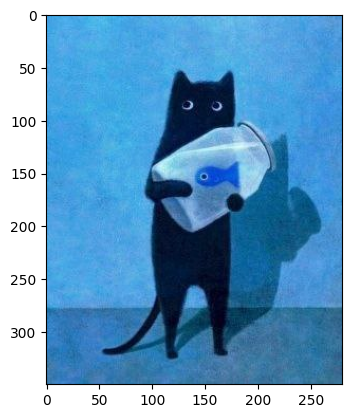

In [38]:
import matplotlib.pyplot as plt

plt.imshow(im)

convert image to RGB

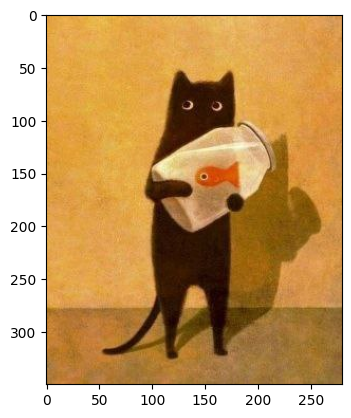

In [39]:
# cv2.cvtColor(input image,switch)
RGB_im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)

read image in RGB

In [40]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)

## Changing pixel values

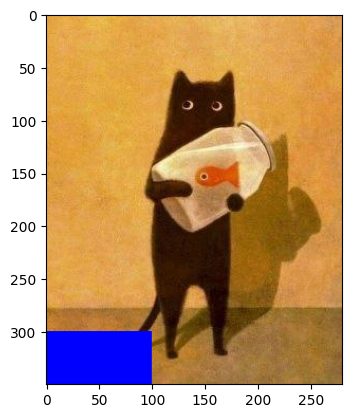

In [41]:
RGB_im[300:400,:100,:]= (0,0,255)

plt.imshow(RGB_im)

## Greyscale images

Greyscale image shape : (350, 280)


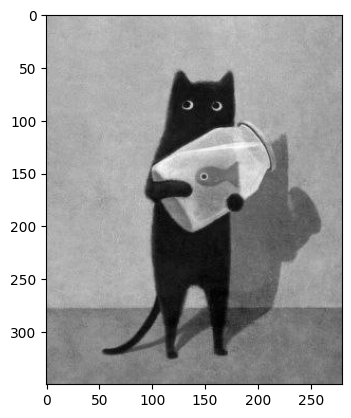

In [43]:
im = cv2.imread("images/Cat.jpg")
# convert to Greyscale
grey_im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

# read in Greyscale
grey_im1 = cv2.imread("images/Cat.jpg",cv2.IMREAD_GRAYSCALE)

# Greyscale shape : (height,width) and one channel (0-255)
print(f"Greyscale image shape : {grey_im.shape}")

#plot image
plt.imshow(grey_im1,cmap="gray")

## Cropping image

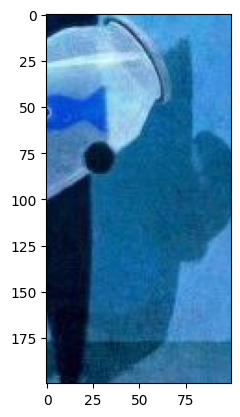

In [47]:
cropped_im = im[100:300,150:250]

plt.imshow(cropped_im)

## Color spaces
using the <code>split</code> the image seperates into 3 channels. each channel is just a ***2D array (height,width)*** of intensity values. When <code>merge</code>, they form the full ***3D color image(height,width,color channels)***.

(350, 280)

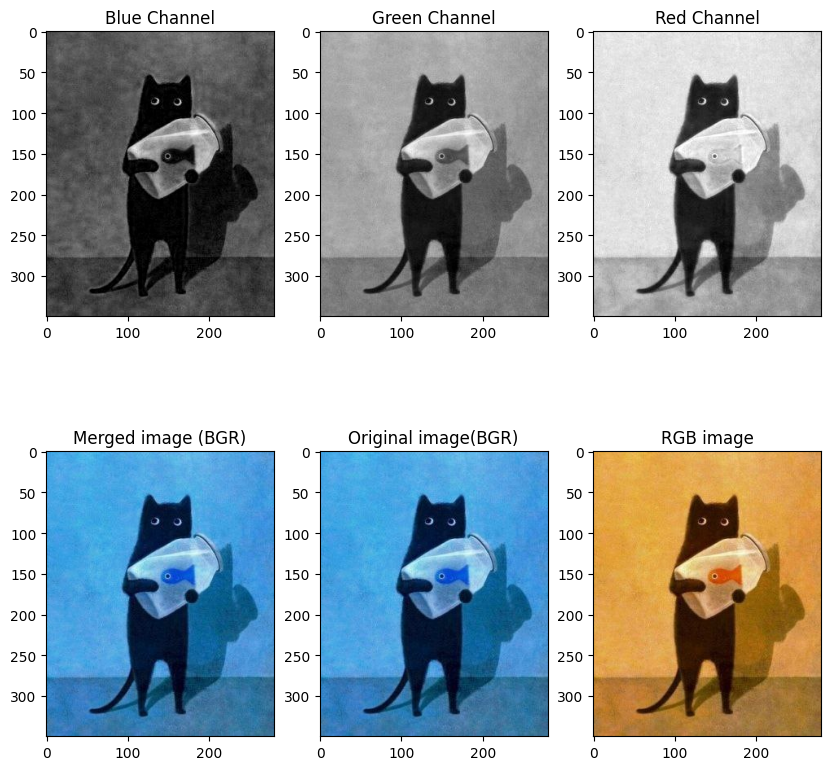

In [69]:
im = cv2.imread("images/Cat.jpg")
# Split
B,G,R = cv2.split(im)

# merge
merged_im = cv2.merge([B,G,R])

plt.figure(figsize=[10,10])
plt.subplot(231);plt.imshow(B,cmap='gray');plt.title("Blue Channel")
plt.subplot(232);plt.imshow(G,cmap='gray');plt.title("Green Channel")
plt.subplot(233);plt.imshow(R,cmap='gray');plt.title("Red Channel")
plt.subplot(234);plt.imshow(merged_im);plt.title("Merged image (BGR)")
plt.subplot(235);plt.imshow(im);plt.title("Original image(BGR)")
plt.subplot(236);plt.imshow(im[:,:,::-1]);plt.title("RGB image")
G.shape

## Copy() method
When assigning an image array directly using <code>Red = im</code>, the variable <code>Red</code> does not create an independent copy; instead, it references the same memory location as <code>im</code>. Consequently, any modifications applied to <code>Red</code> will also affect <code>im</code>. To prevent such unintended side effects, it is advisable to create an explicit duplicate of the array using the <code>copy()</code> method.

Text(0.5, 1.0, 'Original image')

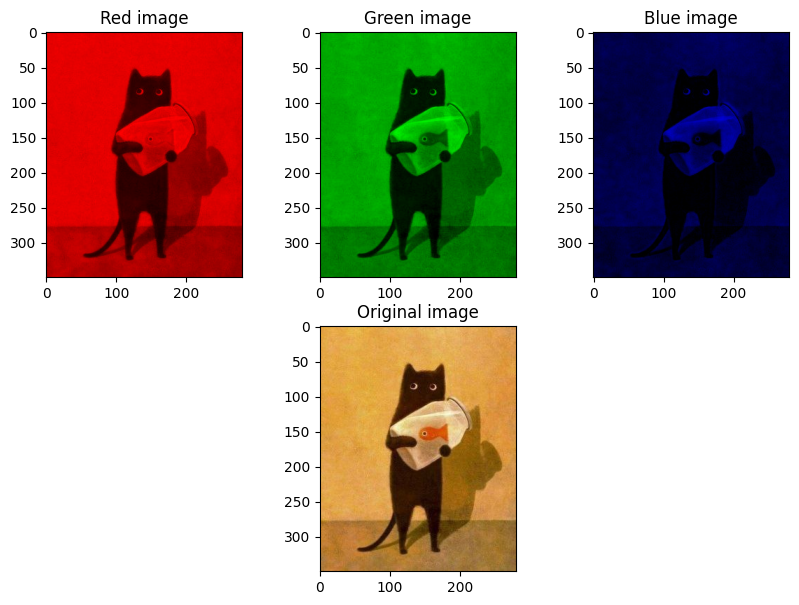

In [95]:
# Read image in RGB
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)

# Red
Red = im.copy()
Red[:,:,1]=0
Red[:,:,2]=0

# Green 
Green = im.copy()
Green[:,:,0]=0
Green[:,:,2]=0

# Blue
Blue = im.copy()
Blue[:,:,0]=0
Blue[:,:,1]=0

plt.figure(figsize=[10,7])
plt.subplot(231);plt.imshow(Red);plt.title("Red image")
plt.subplot(232);plt.imshow(Green);plt.title("Green image")
plt.subplot(233);plt.imshow(Blue);plt.title("Blue image")
plt.subplot(235);plt.imshow(im);plt.title("Original image")


## Changing values of color channels
In OpenCV, images are typically stored as NumPy arrays with the data type <code>uint8</code> (unsigned 8-bit integers). This means that each pixel value is represented within the range 0 to 255. When performing arithmetic operations on <code>uint8</code> arrays, NumPy applies modular (wrap-around) arithmetic: values greater than 255 loop back around starting from 0, and values below 0 wrap down from 255. For example, 250 + 20 would result in 14 instead of being capped at 255. To avoid this undesired overflow behavior, OpenCV provides functions like <code>cv2.add()</code>, which perform saturated arithmetic. In saturated arithmetic, values are clipped to remain within the valid range: anything above 255 is set to 255, and anything below 0 is set to 0. This ensures more predictable and visually correct results when adjusting image brightness or manipulating color channels.

Text(0.5, 1.0, 'Original image')

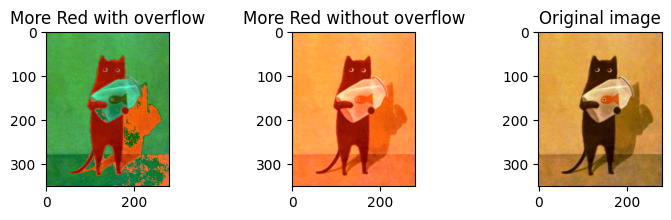

In [142]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)

R,G,B = cv2.split(im)
more_red_not_overflow = cv2.merge([cv2.add(R, 100),G,B])
more_red_overflow = cv2.merge([R+100,G,B])

plt.figure(figsize=[9,2])
plt.subplot(131);plt.imshow(more_red_overflow);plt.title("More Red with overflow")
plt.subplot(132);plt.imshow(more_red_not_overflow);plt.title("More Red without overflow")
plt.subplot(133);plt.imshow(im);plt.title("Original image")

## HSV

**HSV** stands for **Hue, Saturation, and Value**. It is an alternative way to represent colors that separates **color information** from **intensity**, which can be very useful in image processing tasks such as color detection and filtering.

Components of HSV:

1. **Hue (H):**  
   - Represents the **type of color** (e.g., red, green, blue).  
   - In OpenCV, hue ranges from **0 to 179** (instead of 0–360) due to 8-bit representation.  

2. **Saturation (S):**  
   - Indicates the **vividness or purity** of the color.  
   - Ranges from **0 (gray/pale)** to **255 (fully saturated)**.  

3. **Value (V):**  
   - Represents the **brightness** of the color.  
   - Ranges from **0 (black)** to **255 (full brightness)**.

(np.float64(-0.5), np.float64(279.5), np.float64(349.5), np.float64(-0.5))

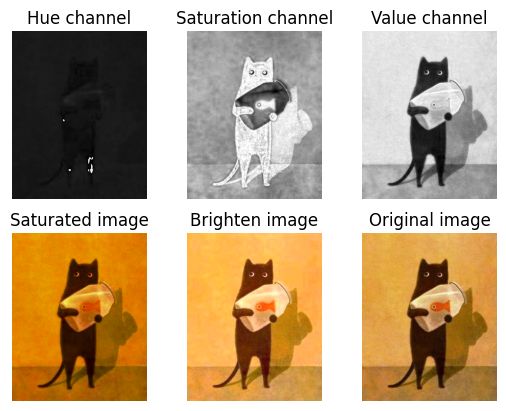

In [143]:
im = cv2.imread("images/Cat.jpg")
hsv_im = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
saturated_im = cv2.merge([hsv_im[:,:,0],cv2.add(hsv_im[:,:,1],100),hsv_im[:,:,2]])
brighten_im  = cv2.merge([hsv_im[:,:,0],hsv_im[:,:,1],cv2.add(hsv_im[:,:,2],50)])
# plt.figure(figsize=[16,4])
plt.subplot(231);plt.imshow(hsv_im[:,:,0],cmap='gray');plt.title("Hue channel");plt.axis('off')
plt.subplot(232);plt.imshow(hsv_im[:,:,1],cmap='gray');plt.title("Saturation channel");plt.axis('off')
plt.subplot(233);plt.imshow(hsv_im[:,:,2],cmap='gray');plt.title("Value channel");plt.axis('off')
plt.subplot(234);plt.imshow(cv2.cvtColor(saturated_im,cv2.COLOR_HSV2RGB));plt.title("Saturated image");plt.axis('off')
plt.subplot(235);plt.imshow(cv2.cvtColor(brighten_im,cv2.COLOR_HSV2RGB));plt.title("Brighten image");plt.axis('off')
plt.subplot(236);plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB));plt.title("Original image");plt.axis('off')